In [41]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_BTC"
pair2 = "BTC_XMR"
pair3 = "BTC_ETH"
pair4 = "BTC_STR"

start=string2ts("2017-10-02 00:00:00")
end=string2ts("2017-12-11 00:00:00")
period=3600*4

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df2 = prepareData(pair=pair2,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df3  = prepareData(pair=pair3,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df4  = prepareData(pair=pair4,
                  start=start,
                  end=end,
                  period=period)


per = 0.45
cum_return1 = marketReturn(df["close"])
#cum_return1 = marketReturn(df_train)
#cum_return2 = marketReturn(df_test) 

marketReturn = cum_return1[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,1.7)

from strategy2 import EMAvsSMA,pricevsEMA, pricevsSMA, SMAvsSMA, EMAvsSMA2
from profit import profit,profit2

#EMA_5vsSMA_13
#w = SMAvsSMA(df['close'])
#relativeReturn,v = profit(w)

#EMA_5vsSMA_13
#w9 = EMAvsSMA(df['close'])
#relativeReturn9,v9 = profit(w9)

#Precio vs SMA_20
#w3 = pricevsSMA(df['close'])
#relativeReturn3,v3 = profit(w3)

# EMA vs SMA
# 23.6
w2 = EMAvsSMA2(df['close'], df["volatility"])
relativeReturn2,v2 = profit(w2)

#ml_logreg 
# recalculando el tiempo inicial en virtud del entrenamiento del
# algoritmo 
start = ml_init_time(end,start,per)
# cargando y preparando datos
df2 = prepareData(pair=pair, start=start, end=end, period=period)
w4, t = run_strategy("ml_logreg",df2,pair,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df2,pair,True,per)
relativeReturn6,v6 = profit(w6)

returns1 = pd.DataFrame(index=df.index)

returns1["knn"] = v6*100
returns1["sma2"] = v2*100

returns1.fillna(method='bfill', inplace=True)
# Guardando los datos como lista de diccionarios en un archivo de texto
# esto permite acceder a ellos y trabajar como data frame offline

 
    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketReturn)
#print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
#print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
#print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
#print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)

per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	USDT_BTC

Retorno del mercacdo: 275.959038489
Retorno de EMA vs SMA2: 153.669981558
Retorno de ml_logreg: 236.24415403
Retorno de ml_knn: 310.796498162


378.0
462 462 420 420 840 0.45


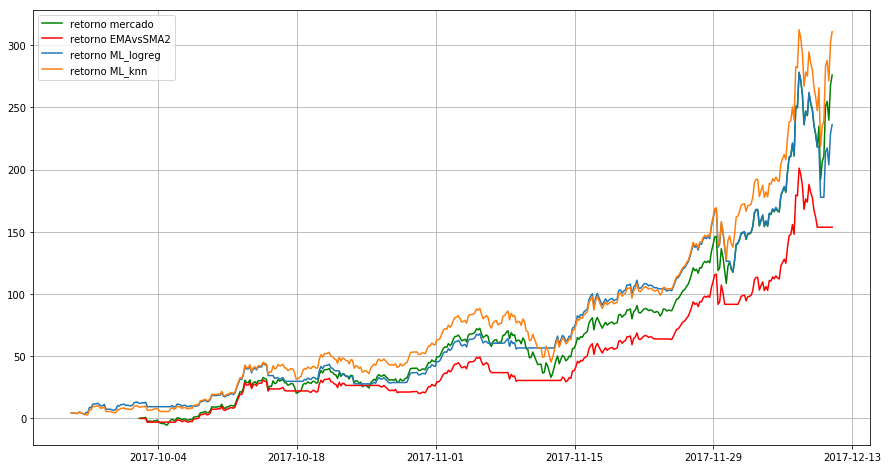

In [42]:
plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
#plt.plot(df.index[:],v*100,'y',label='retorno EMAvsSMA')
#plt.plot(df.index[:],v3*100,'b',label='retorno SMA_20')
plt.plot(df.index[:],v2*100,'r',label='retorno EMAvsSMA2')
plt.plot(df2.index[int(len(df2)*per):],v4*100,label='retorno ML_logreg')
#plt.plot(df2.index[int(len(df2)*per):],v5*100,label='retorno ML_randfor')
plt.plot(df2.index[int(len(df2)*per):],v6*100,label='retorno ML_knn')

plt.legend(loc='best')
plt.grid()

print len(df2)*per
print len(df2.index[int(len(df2)*per):]), len(v4), len(v2), len(df.index), len(df2.index), per

In [43]:
w2 = EMAvsSMA2(df2['close'], df2["volatility"])
relativeReturn2,v2 = profit(w2)

#ml_logreg 
# recalculando el tiempo inicial en virtud del entrenamiento del
# algoritmo 
start = ml_init_time(end,start,per)
# cargando y preparando datos
df22 = prepareData(pair=pair, start=start, end=end, period=period)
w4, t = run_strategy("ml_logreg",df22,pair,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df22,pair,True,per)
relativeReturn6,v6 = profit(w6)

returns2 = pd.DataFrame(index=df.index)
returns2["knn"] = v6*100
returns2["sma2"] = v2*100


print "\n\t%s\n"%pair2
print 'Retorno del mercacdo: %s'%(marketReturn)
#print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
#print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
#print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
#print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)


per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-03-06 00:00:00


	BTC_XMR

Retorno del mercacdo: 275.959038489
Retorno de EMA vs SMA2: 261.453450871
Retorno de ml_logreg: 171.376657352
Retorno de ml_knn: 589.960975679


In [44]:
w2 = EMAvsSMA2(df3['close'], df3["volatility"])
relativeReturn2,v2 = profit(w2)

#ml_logreg 
# recalculando el tiempo inicial en virtud del entrenamiento del
# algoritmo 
start = ml_init_time(end,start,per)
# cargando y preparando datos
df23 = prepareData(pair=pair, start=start, end=end, period=period)
w4, t = run_strategy("ml_logreg",df23,pair,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df23,pair,True,per)
relativeReturn6,v6 = profit(w6)

returns3 = pd.DataFrame(index=df.index)
returns3["knn"] = v6*100
returns3["sma2"] = v2*100

print "\n\t%s\n"%pair3
print 'Retorno del mercacdo: %s'%(marketReturn)
#print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
#print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
#print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
#print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)

per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2016-05-30 00:00:00


	BTC_ETH

Retorno del mercacdo: 275.959038489
Retorno de EMA vs SMA2: -10.8677361772
Retorno de ml_logreg: 286.322352569
Retorno de ml_knn: 1257.56532679


In [45]:
w2 = EMAvsSMA2(df4['close'], df4["volatility"])
relativeReturn2,v2 = profit(w2)

#ml_logreg 
# recalculando el tiempo inicial en virtud del entrenamiento del
# algoritmo 
start = ml_init_time(end,start,per)
# cargando y preparando datos
df24 = prepareData(pair=pair, start=start, end=end, period=period)
w4, t = run_strategy("ml_logreg",df24,pair,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df24,pair,True,per)
relativeReturn6,v6 = profit(w6)

returns4 = pd.DataFrame(index=df.index)
returns4["knn"] = v6*100
returns4["sma2"] = v2*100


print "\n\t%s\n"%pair4
print 'Retorno del mercacdo: %s'%(marketReturn)
#print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
#print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
#print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
#print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)

per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2014-11-17 00:00:00


	BTC_STR

Retorno del mercacdo: 275.959038489
Retorno de EMA vs SMA2: 217.286893495
Retorno de ml_logreg: 57.9882577962
Retorno de ml_knn: 1917.10837278


In [46]:
writer = pd.ExcelWriter('2w_returns.xlsx')
returns1.to_excel(writer,'%s'%pair)
returns2.to_excel(writer,'%s'%pair2)
returns3.to_excel(writer,'%s'%pair3)
returns4.to_excel(writer,'%s'%pair4)
writer.save()